## Machine Learning in Agriculture

Recently we have observed the emerging concept of smart farming that makes agriculture more efficient and effective with the help of high-precision algorithms. The mechanism that drives it is Machine Learning — the scientific field that gives machines the ability to learn without being strictly programmed. It has emerged together with big data technologies and high-performance computing to create new opportunities to unravel, quantify, and understand data intensive processes in agricultural operational environments.



Machine learning is everywhere throughout the whole growing and harvesting cycle. It begins with a seed being planted in the soil — from the soil preparation, seeds breeding and water feed measurement — and it ends when neural networks pick up the harvest determining the ripeness with the help of computer vision.

### The Toxic Pesticides

Though, many of us don't appreciate much, but a farmer's job is real test of endurance and determination. Once the seeds are sown, he works days and nights to make sure that he cultivates a good harvest at the end of season. A good harvest is ensured by several factors such as availability of water, soil fertility, protecting crops from rodents, timely use of pesticides & other useful chemicals and nature. While a lot of these factors are difficult to control for, the amount and frequency of pesticides is something the farmer can control.

Pesticides are also special, because while they protect the crop with the right dosage. But, if you add more than required, they may spoil the entire harvest. A high level of pesticide can deem the crop dead / unsuitable for consumption among many outcomes. This data is based on crops harvested by various farmers at the end of harvest season. To simplify the problem, you can assume that all other factors like variations in farming techniques have been controlled for.

#### We need to determine the outcome of the harvest season, i.e. whether the crop would be healthy (alive), damaged by pesticides or damaged by other reasons.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from scipy import stats
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
ag_train_df = pd.read_csv('train_agriculture.csv')
ag_test_df = pd.read_csv('test_agriculture.csv')

In [3]:
ag_train_df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [4]:
ag_train_df.shape

(4599, 10)

In [5]:
ag_test_df.shape

(1199, 9)

Checking columns

In [6]:
ag_train_df.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [7]:
ag_train_df.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

Dataset has only two type of data type object and numeric

In [8]:
ag_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


### Checking for null values

In [9]:
ag_train_df.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

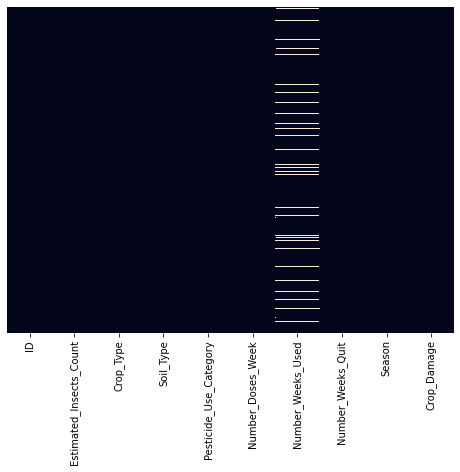

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(ag_train_df.isnull(),yticklabels = False,cbar = False)

In [11]:
ag_train_df = ag_train_df.dropna()

In [12]:
ag_train_df.shape

(4157, 10)

In [13]:
#Dividing dataframe columns into two lists one is categorical and another is continues
categorical_feat = []
continous_feat = []
for column in ag_train_df.columns:
    print('************************************')
    print(f"{column} : {ag_train_df[column].unique()}")
    if len(ag_train_df[column].unique()) <= 10:
        categorical_feat.append(column)
    else:
        continous_feat.append(column)

************************************
ID : ['F00000001' 'F00000003' 'F00000004' ... 'F00008080' 'F00008082'
 'F00008083']
************************************
Estimated_Insects_Count : [ 188  209  257  342  577  731 1132 1575 1785 2138 2401 2999 3516 3895
 4096  150  151  168  232  231  256  283  312  311  375  410  448  488
  489  531  626  625  677  732  789  790  851  915  916  984 1056 1212
 1296 1297 1385 1478 1576 1678 1786 1898 2015 2016 2139 2267 2402 2542
 2541 2688 2687 2840 3164 3165 3336 3337 3702 3896  169  411  850 3515
 4097]
************************************
Crop_Type : [1 0]
************************************
Soil_Type : [0 1]
************************************
Pesticide_Use_Category : [1 3 2]
************************************
Number_Doses_Week : [ 0 30 40 60 20 25 45 50 15 10  5 35 70 55 80 90 85 65 75 95]
************************************
Number_Weeks_Used : [ 0. 26. 20. 15. 14. 19. 24.  8. 23. 25. 28. 29. 22. 21. 17. 30. 35. 32.
 27. 16. 31. 33. 34. 39. 

In [14]:
print(categorical_feat)

['Crop_Type', 'Soil_Type', 'Pesticide_Use_Category', 'Season', 'Crop_Damage']


In [15]:
print(continous_feat)

['ID', 'Estimated_Insects_Count', 'Number_Doses_Week', 'Number_Weeks_Used', 'Number_Weeks_Quit']


In [16]:
ag_train_df.drop(['ID'], axis=1, inplace=True)
ag_train_df

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...
4593,2138,0,1,2,60,47.0,6,3,0
4595,2139,0,1,2,30,47.0,2,1,1
4596,2267,0,1,2,10,7.0,27,2,0
4597,2267,0,1,2,10,20.0,24,2,0


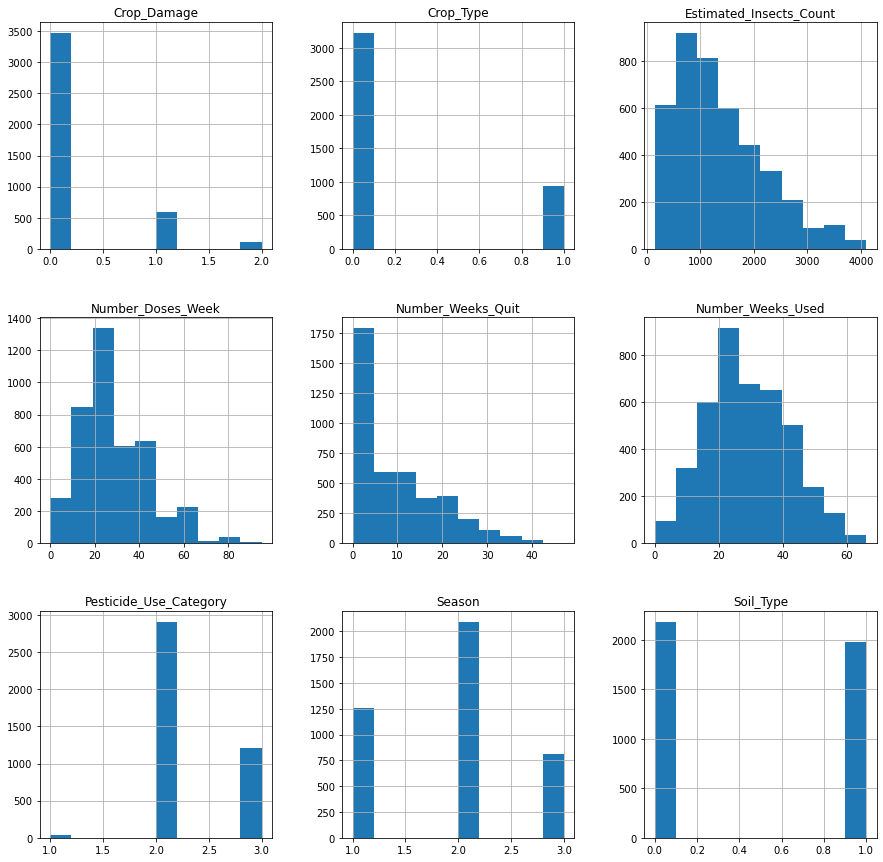

In [17]:
ag_train_df.hist(figsize=(15,15))
plt.show()

In [18]:
ag_train_df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000
mean,1368.286264,0.225403,0.475343,2.282175,26.528747,28.891027,9.293481,1.891989,0.191484
std,815.550890,0.417898,0.499452,0.471010,15.651629,12.586005,9.753605,0.696910,0.452663
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,732.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,0.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


In [19]:
ag_train_df_corr = ag_train_df.corr()
ag_train_df_corr

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.039040,-0.156353,-0.035732,-0.124894,0.449470,0.249871,-0.015429,0.196067
Crop_Type,-0.039040,1.000000,-0.174532,0.355242,-0.165631,-0.002237,-0.272315,0.001822,0.027448
Soil_Type,-0.156353,-0.174532,1.000000,0.020889,0.051378,-0.098399,-0.037584,0.003753,-0.057868
Pesticide_Use_Category,-0.035732,0.355242,0.020889,1.000000,-0.007122,0.387982,-0.570960,0.010773,0.202449
Number_Doses_Week,-0.124894,-0.165631,0.051378,-0.007122,1.000000,0.104022,-0.032430,-0.006366,-0.017724
Number_Weeks_Used,0.449470,-0.002237,-0.098399,0.387982,0.104022,1.000000,-0.467386,-0.011108,0.244988
Number_Weeks_Quit,0.249871,-0.272315,-0.037584,-0.570960,-0.032430,-0.467386,1.000000,0.002753,-0.155354
Season,-0.015429,0.001822,0.003753,0.010773,-0.006366,-0.011108,0.002753,1.000000,-0.016798
Crop_Damage,0.196067,0.027448,-0.057868,0.202449,-0.017724,0.244988,-0.155354,-0.016798,1.000000


<function matplotlib.pyplot.show(*args, **kw)>

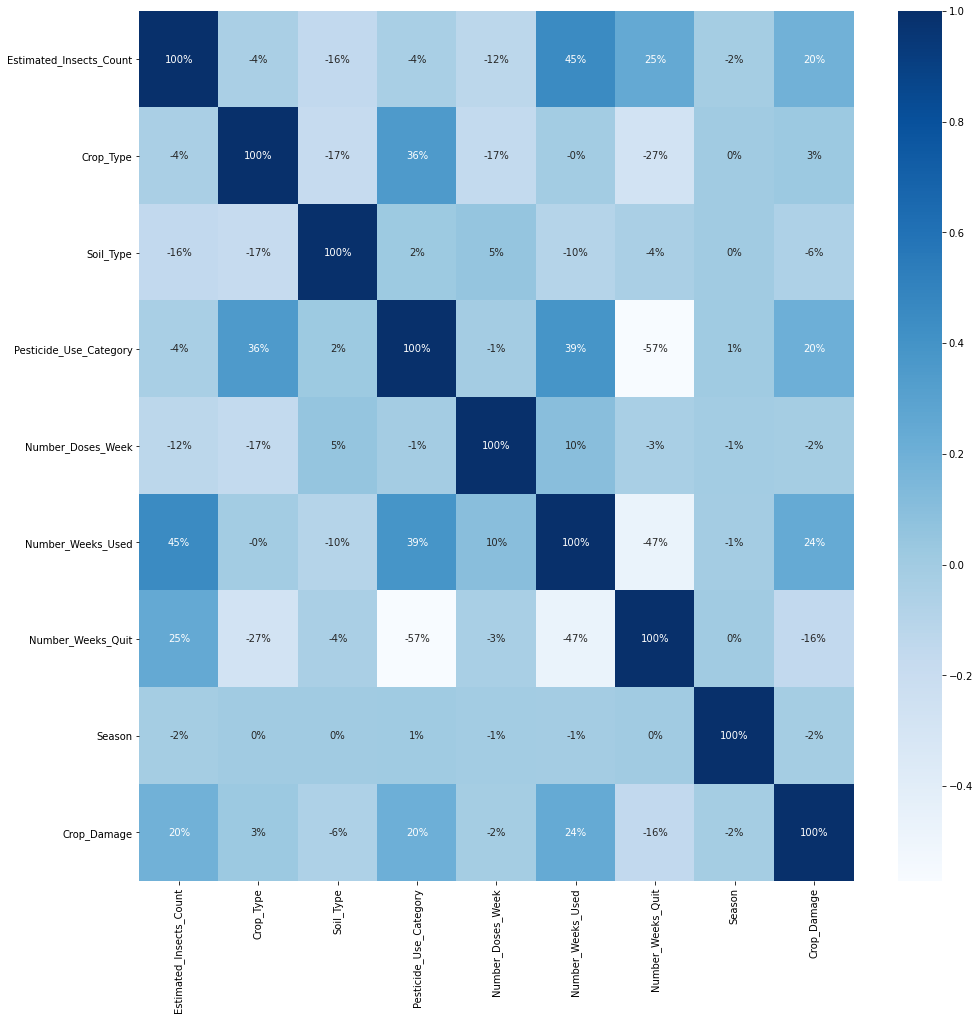

In [20]:
plt.figure(figsize=(16,16))
sns.heatmap(ag_train_df_corr, annot=True, fmt='.0%',cmap='Blues')
plt.show

Text(0.5, 1.0, 'correlation with Crop_Damage variable')

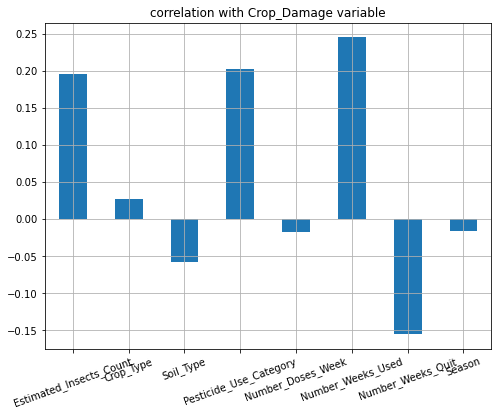

In [21]:
plt.figure(figsize=(8,6))
ag_train_df.drop('Crop_Damage', axis =1).corrwith(ag_train_df['Crop_Damage']).plot(kind='bar', grid=True)
plt.xticks(rotation=20)
plt.title('correlation with Crop_Damage variable')

### Univariate

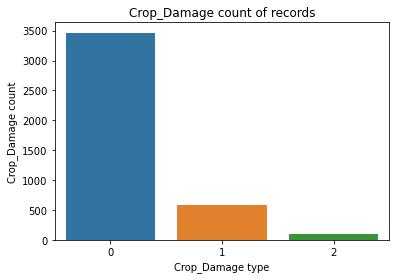

0    3465
1     588
2     104
Name: Crop_Damage, dtype: int64


In [22]:
plt.subplots(figsize=(6,4))
sns.countplot(x = 'Crop_Damage', data=ag_train_df)
plt.title('Crop_Damage count of records')
plt.xlabel('Crop_Damage type')
plt.ylabel('Crop_Damage count')
plt.show()

print(ag_train_df['Crop_Damage'].value_counts())

#### Observations:-

0 = Alive

1 = Damaged due to other causes

2 = Damage due to pesticides

1. 3465 Number of crop is alive

2. Least amount i.e., 104 number of crop is damaged due to pesticides

3. Compared to pesticides damage, damage due to other causes is high i.e., 588

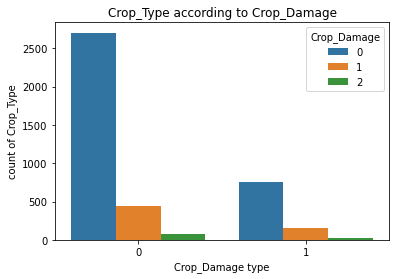

Crop_Type  Crop_Damage
0          0              2703
           1               439
           2                78
1          0               762
           1               149
           2                26
Name: Crop_Damage, dtype: int64


In [23]:
sns.countplot(x='Crop_Type', hue = 'Crop_Damage', data=ag_train_df)
plt.title('Crop_Type according to Crop_Damage')
plt.xlabel('Crop_Damage type')
plt.ylabel('count of Crop_Type')
plt.show()

print(ag_train_df.groupby('Crop_Type')['Crop_Damage'].value_counts())

### Observations:-

1. "0" Type crop has more damage compared to "1" type crop 

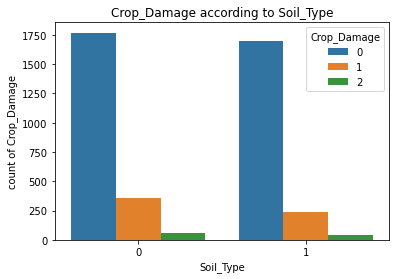

Crop_Damage  Soil_Type
0            0            1768
             1            1697
1            0             354
             1             234
2            0              59
             1              45
Name: Soil_Type, dtype: int64


In [24]:
sns.countplot(x='Soil_Type', hue = 'Crop_Damage', data=ag_train_df)
plt.title('Crop_Damage according to Soil_Type')
plt.xlabel('Soil_Type')
plt.ylabel('count of Crop_Damage')
plt.show()

print(ag_train_df.groupby('Crop_Damage')['Soil_Type'].value_counts())

### Observations:-

Soil type "0" has the highest damage (damage due to other causes) records 1697

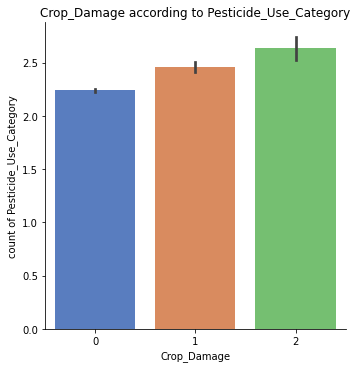

In [25]:
sns.factorplot(x='Crop_Damage', y ='Pesticide_Use_Category', data=ag_train_df, kind = 'bar',size = 5, palette = 'muted',aspect = 1)
plt.title('Crop_Damage according to Pesticide_Use_Category')
plt.ylabel('count of Pesticide_Use_Category')
plt.show()




### Observations:-

Crop damage due to pesticides high when pesticides usage catogory is reaching 3

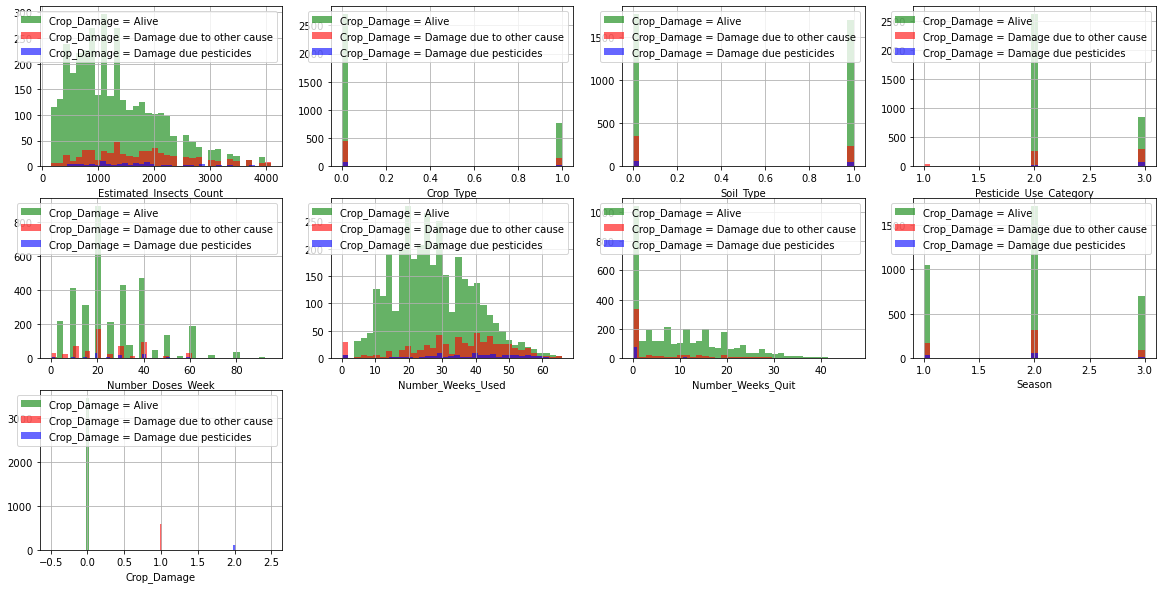

In [26]:
plt.figure(figsize=(20, 10))
col = ag_train_df.columns
for i, column in enumerate(col, 1):
    plt.subplot(3, 4, i)
    ag_train_df[ag_train_df["Crop_Damage"] == 0][column].hist(bins=35, color='Green', label='Crop_Damage = Alive', alpha=0.6)
    ag_train_df[ag_train_df["Crop_Damage"] == 1][column].hist(bins=35, color='red', label='Crop_Damage = Damage due to other cause', alpha=0.6)
    ag_train_df[ag_train_df["Crop_Damage"] == 2][column].hist(bins=35, color='blue', label='Crop_Damage = Damage due pesticides', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

### Observations:-

From Estimated insect count, Where ever estimated insect count is high, there was high impact of crop damage

From Number of weeks used, Over dosage of pesticides is also causes high Crop damage

Number of weeks quit, quiting increasing also causes high crop damage

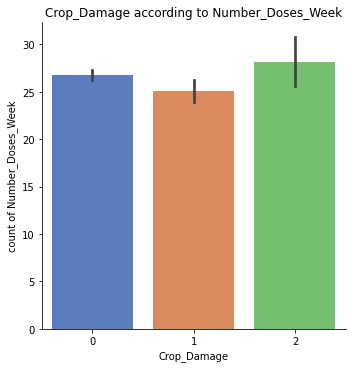

In [27]:
sns.factorplot(x='Crop_Damage', y ='Number_Doses_Week', data=ag_train_df, kind = 'bar',size = 5, palette = 'muted',aspect = 1)
plt.title('Crop_Damage according to Number_Doses_Week')
plt.ylabel('count of Number_Doses_Week')
plt.show()

### Observation:-

Damage due to pesticides is high when number of doses per week high

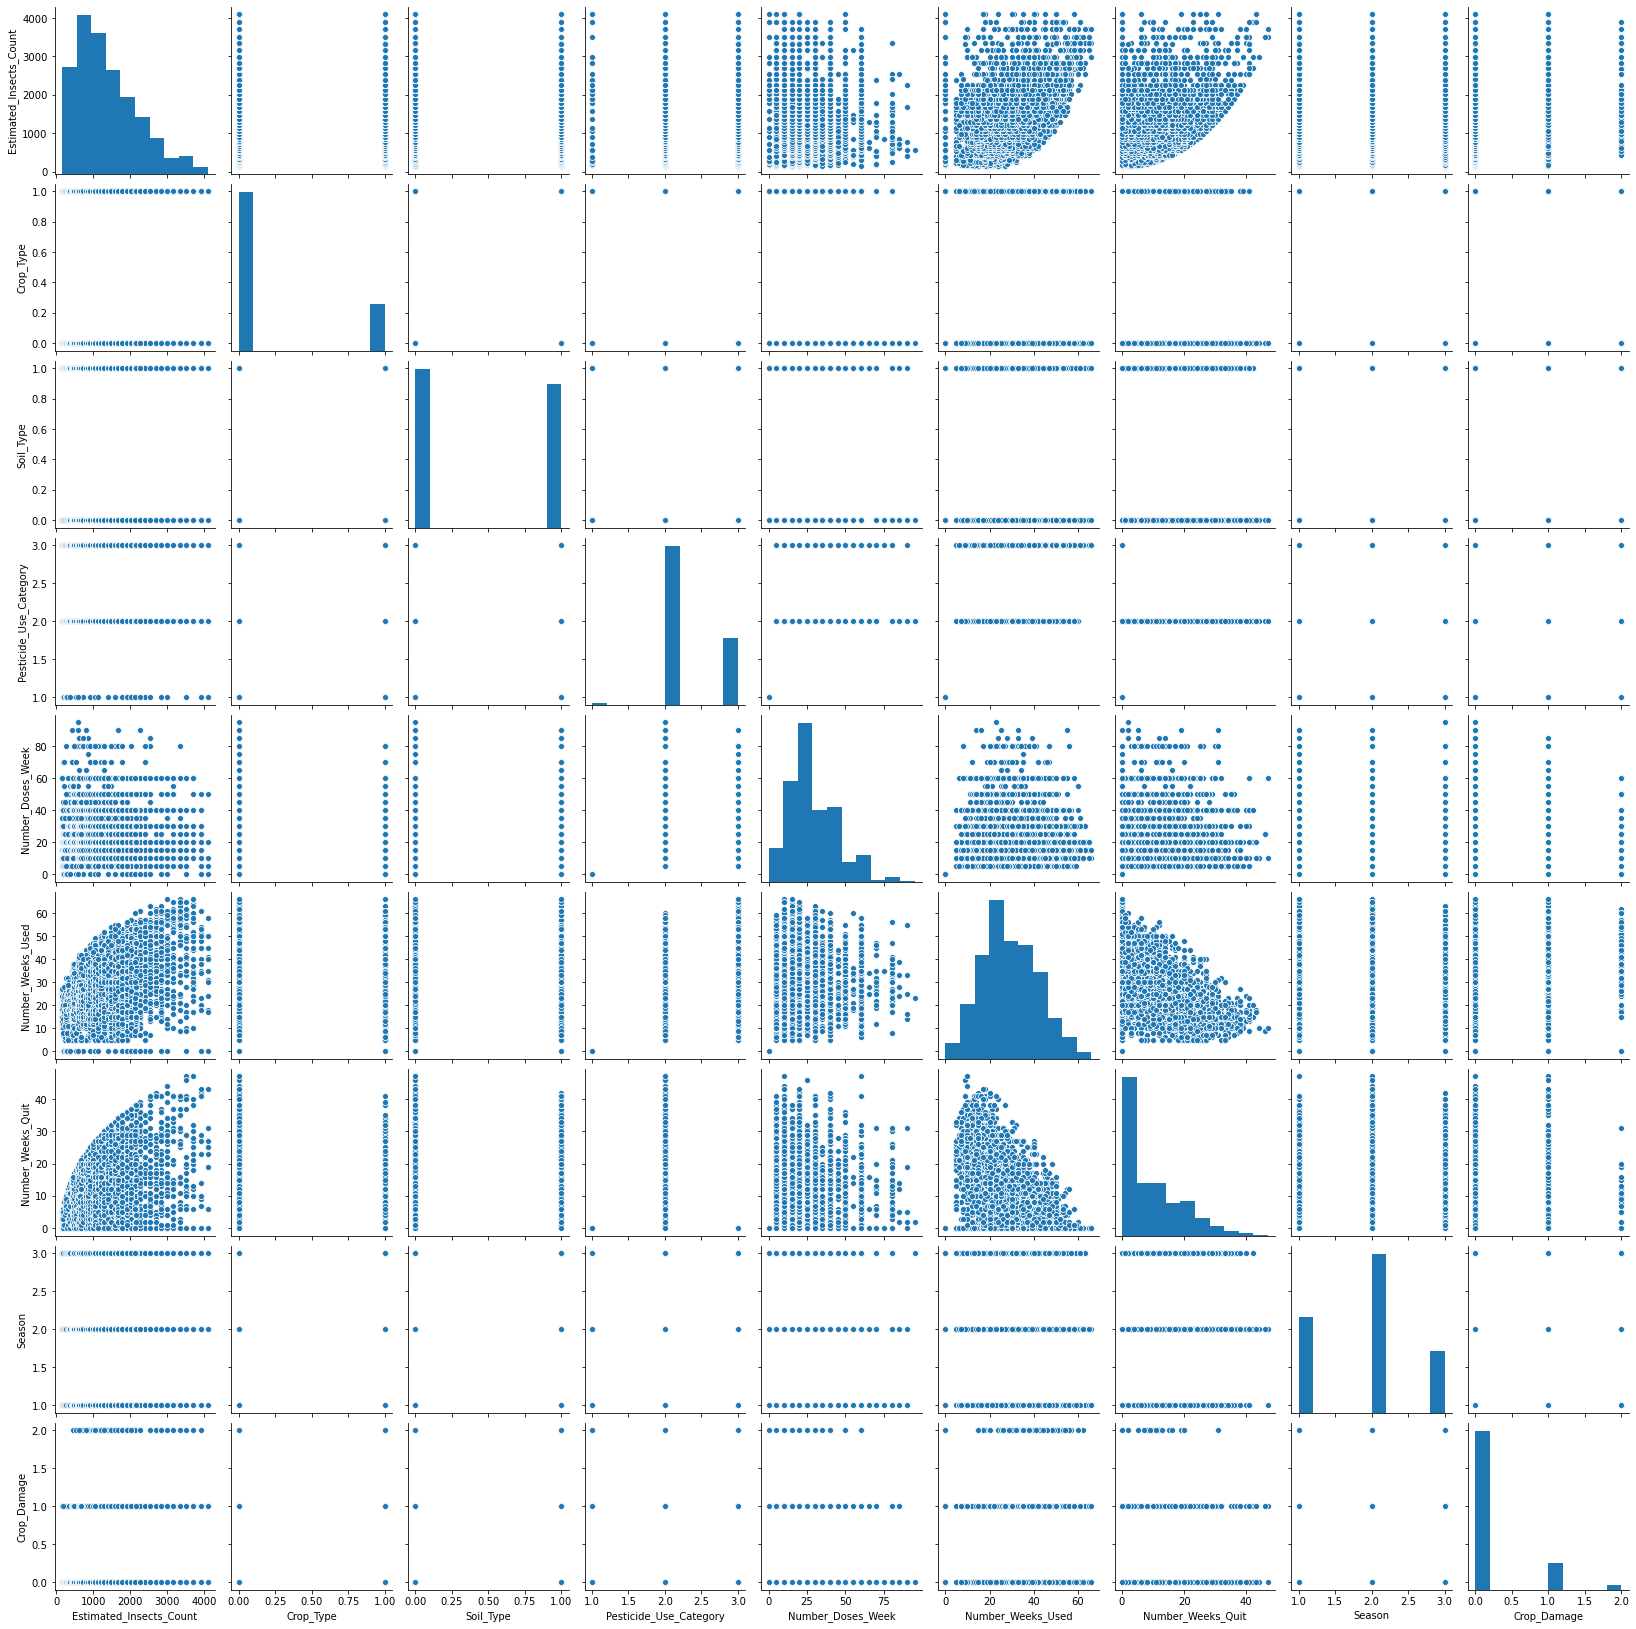

In [28]:
sns.pairplot(ag_train_df)

### To Check Distribution Skewness

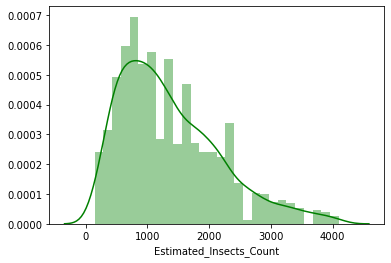

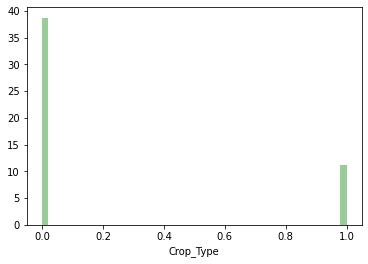

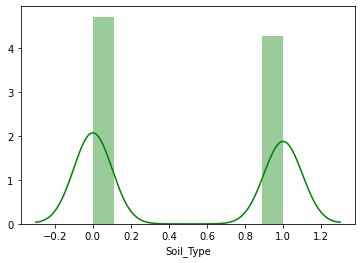

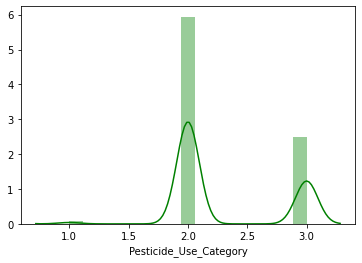

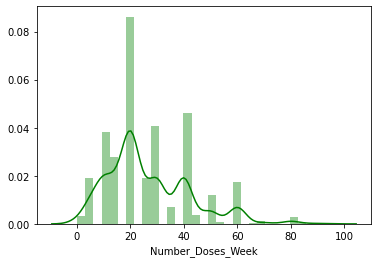

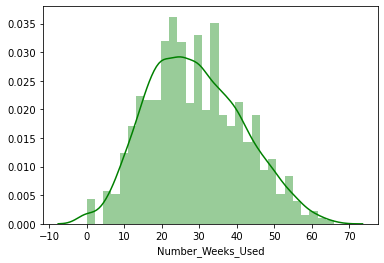

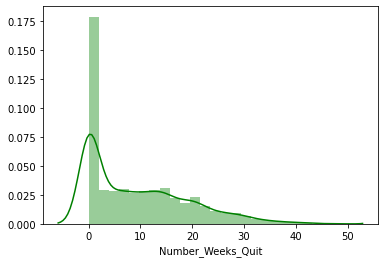

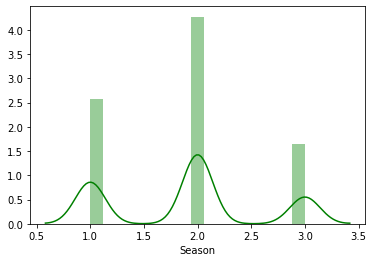

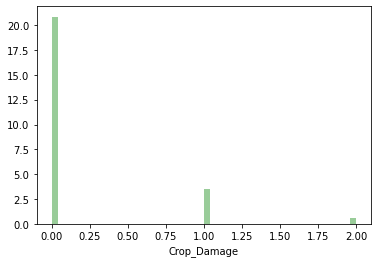

In [29]:
for col in ag_train_df.describe().columns:
    sns.distplot(ag_train_df[col], color ='g')
    plt.show()

In [30]:
ag_train_df.skew()

Estimated_Insects_Count    0.915308
Crop_Type                  1.314816
Soil_Type                  0.098785
Pesticide_Use_Category     0.689065
Number_Doses_Week          0.963165
Number_Weeks_Used          0.264944
Number_Weeks_Quit          0.916936
Season                     0.149567
Crop_Damage                2.340099
dtype: float64

In [31]:
#Treating skewness via square root method and cube root method.
ag_train_df.skew()
for col in ag_train_df.skew().index:
    if col in ag_train_df.describe().columns:
        if ag_train_df[col].skew()>0.55:
            ag_train_df[col]=np.sqrt(ag_train_df[col])
        if ag_train_df[col].skew()<=0.55:
            ag_train_df[col]=np.cbrt(ag_train_df[col])

In [32]:
ag_train_df.skew()

Estimated_Insects_Count   -0.232878
Crop_Type                  1.314816
Soil_Type                  0.098785
Pesticide_Use_Category     0.307994
Number_Doses_Week         -3.293322
Number_Weeks_Used         -1.684385
Number_Weeks_Quit         -0.604680
Season                    -0.204206
Crop_Damage                1.898226
dtype: float64

### Check for Outliers

Estimated_Insects_Count       AxesSubplot(0.125,0.536818;0.133621x0.343182)
Crop_Type                  AxesSubplot(0.285345,0.536818;0.133621x0.343182)
Soil_Type                   AxesSubplot(0.44569,0.536818;0.133621x0.343182)
Pesticide_Use_Category     AxesSubplot(0.606034,0.536818;0.133621x0.343182)
Number_Doses_Week          AxesSubplot(0.766379,0.536818;0.133621x0.343182)
Number_Weeks_Used                AxesSubplot(0.125,0.125;0.133621x0.343182)
Number_Weeks_Quit             AxesSubplot(0.285345,0.125;0.133621x0.343182)
Season                         AxesSubplot(0.44569,0.125;0.133621x0.343182)
Crop_Damage                   AxesSubplot(0.606034,0.125;0.133621x0.343182)
dtype: object

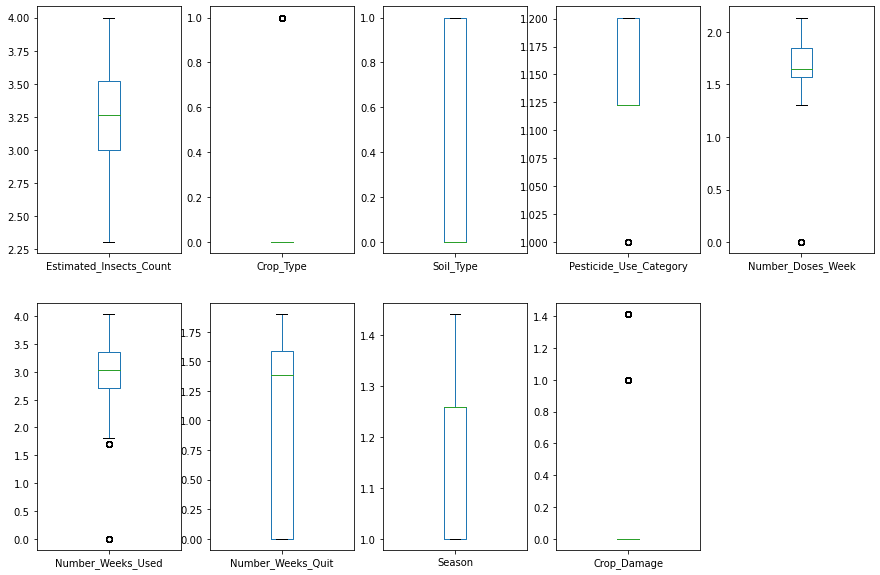

In [33]:
ag_train_df.plot(kind = 'box', subplots = True, layout = (2,5), figsize= (15,10))

In [34]:
z = np.abs(stats.zscore(ag_train_df))
z

array([[2.45063494, 1.85377978, 0.95184369, ..., 1.4132104 , 1.36944542,
        0.44177479],
       [2.32802113, 1.85377978, 0.95184369, ..., 1.4132104 , 0.27278553,
        2.05654142],
       [2.08230491, 1.85377978, 0.95184369, ..., 1.4132104 , 0.27278553,
        2.05654142],
       ...,
       [1.09109669, 0.5394384 , 1.05059266, ..., 1.00969922, 0.27278553,
        0.44177479],
       [1.09109669, 0.5394384 , 1.05059266, ..., 0.96260008, 0.27278553,
        0.44177479],
       [1.09109669, 0.5394384 , 1.05059266, ..., 0.82990392, 0.27278553,
        0.44177479]])

In [35]:
threshold = 3
print(np.where(z > 3))

(array([   0,    0,    0,    1,    1,    1,    2,    2,    2,    3,    3,
          3,    4,    4,    4,    5,    5,    5,    5,    6,    6,    6,
          7,    7,    7,    7,    8,    8,    8,    9,    9,    9,   10,
         10,   10,   11,   11,   11,   11,   12,   12,   12,   13,   13,
         13,   14,   14,   14,   15,   15,   15,   16,   16,   16,   17,
         17,   17,   18,   18,   18,   19,   19,   19,   93,  102,  136,
        149,  150,  151,  162,  169,  179,  186,  199,  200,  219,  225,
        239,  240,  262,  268,  274,  284,  316,  319,  325,  336,  339,
        411,  415,  422,  433,  462,  467,  472,  505,  551,  571,  627,
        736, 1058, 1192, 1204, 1205, 1559, 1621, 1837, 1928, 1953, 1954,
       2009, 2313, 2313, 2313, 2314, 2314, 2314, 2315, 2315, 2315, 2316,
       2316, 2316, 2317, 2317, 2317, 2318, 2318, 2318, 2319, 2319, 2319,
       2320, 2320, 2320, 2321, 2321, 2321, 2322, 2322, 2322, 2323, 2323,
       2323, 2324, 2324, 2324, 2325, 2325, 2325, 2

In [36]:
ag_train_df_z = ag_train_df[z>3]
ag_train_df_z = ag_train_df_z[~ag_train_df_z.index.duplicated(keep='first')]
ag_train_df_new = pd.concat([ag_train_df, ag_train_df_z, ag_train_df_z]).drop_duplicates(keep=False)

In [37]:
ag_train_df = ag_train_df_new

No Outliers in continues data observed

### Feature Scaling

In [38]:
# import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 5))
hr_scale = list(ag_train_df.columns)
hr_scale.remove('Crop_Damage')
for col in hr_scale:
    ag_train_df[col] = ag_train_df[col].astype(float)
    ag_train_df[[col]] = scaler.fit_transform(ag_train_df[[col]])
ag_train_df['Crop_Damage'] = pd.to_numeric(ag_train_df['Crop_Damage'], downcast='float')
ag_train_df.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
24,0.000000,0.0,0.0,5.0,2.746589,2.686354,0.0,2.938624,0.0
25,0.007534,0.0,0.0,5.0,3.269121,2.154285,0.0,0.000000,0.0
26,0.000000,0.0,0.0,5.0,4.049456,1.621944,0.0,2.938624,0.0
27,0.129644,0.0,5.0,5.0,2.051390,1.501688,0.0,2.938624,0.0
28,0.129644,0.0,5.0,5.0,2.051390,1.621944,0.0,2.938624,1.0


### Model Training

In [39]:
ag_train_df.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
24,0.000000,0.0,0.0,5.0,2.746589,2.686354,0.0,2.938624,0.0
25,0.007534,0.0,0.0,5.0,3.269121,2.154285,0.0,0.000000,0.0
26,0.000000,0.0,0.0,5.0,4.049456,1.621944,0.0,2.938624,0.0
27,0.129644,0.0,5.0,5.0,2.051390,1.501688,0.0,2.938624,0.0
28,0.129644,0.0,5.0,5.0,2.051390,1.621944,0.0,2.938624,1.0


#### Spliting data into input and output variable

In [40]:
df_x = ag_train_df.drop(['Crop_Damage'], axis = 1)

In [41]:
y = ag_train_df['Crop_Damage']
y

24      0.0
25      0.0
26      0.0
27      0.0
28      1.0
       ... 
4593    0.0
4595    1.0
4596    0.0
4597    0.0
4598    0.0
Name: Crop_Damage, Length: 4016, dtype: float32

#### Checking for shape of input and target variable

In [42]:
print(df_x.shape, '\n', y.shape)

(4016, 8) 
 (4016,)


#### scaling input variable

In [43]:
ss = StandardScaler()
x = ss.fit_transform(df_x)
x

array([[-2.700218  , -0.53396629, -0.95423339, ..., -0.08413235,
        -1.46730609,  0.27109506],
       [-2.69284837, -0.53396629, -0.95423339, ..., -0.62674274,
        -1.46730609, -1.36795639],
       [-2.700218  , -0.53396629, -0.95423339, ..., -1.16963112,
        -1.46730609,  0.27109506],
       ...,
       [ 1.10678293, -0.53396629,  1.04796165, ..., -2.37979654,
         0.98708443,  0.27109506],
       [ 1.10678293, -0.53396629,  1.04796165, ..., -0.62674274,
         0.93937333,  0.27109506],
       [ 1.10678293, -0.53396629,  1.04796165, ...,  0.45182839,
         0.80495304,  0.27109506]])

#### spliting data into training and testing data

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 20, random_state=42, stratify=y)

In [45]:
x_train

array([[ 0.1773974 , -0.53396629,  1.04796165, ..., -1.42089705,
         0.86734169,  0.27109506],
       [ 0.90339337, -0.53396629,  1.04796165, ..., -0.25473138,
         0.86734169,  0.27109506],
       [-0.91200839, -0.53396629,  1.04796165, ..., -0.00210175,
         0.38570508,  0.27109506],
       ...,
       [ 1.10678293, -0.53396629, -0.95423339, ..., -1.69945381,
         1.08321855, -1.36795639],
       [ 0.69832562, -0.53396629, -0.95423339, ...,  1.49404836,
        -1.46730609, -1.36795639],
       [ 0.28222354,  1.8727774 ,  1.04796165, ...,  1.03908907,
        -1.46730609,  0.27109506]])

##### All Algorithms using for loop

In [46]:
model = [LogisticRegression(), GaussianNB(), SVC(), DecisionTreeClassifier(), KNeighborsClassifier(),
        RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(),BaggingClassifier(), ExtraTreeClassifier()]

for m in model:
    m.fit(x_train, y_train)
    m.score(x_train, y_train)
    pred = m.predict(x_test)
    print('Accuracy score of ', m , ' is : ')
    print(accuracy_score(y_test, pred))
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    print('**************************************************************************************************')
    print('\n')
    

Accuracy score of  LogisticRegression()  is : 
0.85
[[17  0]
 [ 3  0]]
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92        17
         1.0       0.00      0.00      0.00         3

    accuracy                           0.85        20
   macro avg       0.42      0.50      0.46        20
weighted avg       0.72      0.85      0.78        20

**************************************************************************************************


Accuracy score of  GaussianNB()  is : 
0.9
[[17  0]
 [ 2  1]]
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94        17
         1.0       1.00      0.33      0.50         3

    accuracy                           0.90        20
   macro avg       0.95      0.67      0.72        20
weighted avg       0.91      0.90      0.88        20

**************************************************************************************************


Accuracy sc

#### Cross validate the model

In [47]:
model = [LogisticRegression(), GaussianNB(), SVC(), DecisionTreeClassifier(), KNeighborsClassifier(),
        RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(),BaggingClassifier(), ExtraTreeClassifier()]

for m in model:
    score = cross_val_score(m,x,y,cv=15, scoring = 'accuracy')
    print('Model:',m)
    print('Score: ',score)
    print('mean score: ',score.mean())
    print('Standard Deviation', score.std())
    print('**************************************************************************************************')
    print('\n')
    

Model: LogisticRegression()
Score:  [0.67164179 0.7761194  0.90671642 0.8619403  0.8619403  0.8619403
 0.8619403  0.8619403  0.8619403  0.79477612 0.91791045 0.86142322
 0.86516854 0.86142322 0.86142322]
mean score:  0.8458829448264299
Standard Deviation 0.057370711470567555
**************************************************************************************************


Model: GaussianNB()
Score:  [0.44776119 0.41791045 0.93283582 0.9141791  0.88059701 0.8619403
 0.8619403  0.8619403  0.73134328 0.39552239 0.80597015 0.92509363
 0.87265918 0.86142322 0.86142322]
mean score:  0.7755026366295862
Standard Deviation 0.1837708023444158
**************************************************************************************************


Model: SVC()
Score:  [0.64925373 0.83208955 0.8619403  0.8619403  0.8619403  0.8619403
 0.8619403  0.8619403  0.82835821 0.79477612 0.85820896 0.86142322
 0.86142322 0.86142322 0.86142322]
mean score:  0.8386680828069392
Standard Deviation 0.05394841897193

From the above models, Logistic Regression, SVC gives best score

we use grid search CV to find the best parameter and check the score and after that we will finilize our model

In [48]:
parameters = {'C':[1,10], 'random_state':range(42,100)}
lg = LogisticRegression()

clf = GridSearchCV(lg,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'C': 10, 'random_state': 42}


In [52]:
#Logistic Regression with best parameters
lr = LogisticRegression(C=10, random_state=42)
lr.fit(x_train, y_train)
lr.score(x_train, y_train)
predlr = lr.predict(x_test)
print(accuracy_score(y_test, predlr))
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test, predlr))

0.85
[[17  0]
 [ 3  0]]
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92        17
         1.0       0.00      0.00      0.00         3

    accuracy                           0.85        20
   macro avg       0.42      0.50      0.46        20
weighted avg       0.72      0.85      0.78        20



In [53]:
score = cross_val_score(lr,x,y,cv=5, scoring = 'accuracy')
print('Model:',lr)
print('Score: ',score)
print('mean score: ',score.mean())
print('Standard Deviation', score.std())
print('**************************************************************************************************')
print('\n')

Model: LogisticRegression(C=10, random_state=42)
Score:  [0.82960199 0.86176837 0.86176837 0.8630137  0.86176837]
mean score:  0.8555841589065878
Standard Deviation 0.01300003467888761
**************************************************************************************************




In [54]:
# Grid search cross validation

grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(x_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy : 0.8613621553884713


In [57]:
logreg2=LogisticRegression(C=0.001,penalty="l2")
logreg2.fit(x_train,y_train)
print("score",logreg2.score(x_test,y_test))

score 0.85


## Conclusion:-

Finalized Logistic Regression as we get best accuracy score and proved with grid search also